In [ ]:
import sys
import numpy as np
import sympy as sp
from numpy.linalg import inv

sys.path.append('C:\\Users\\Mark\\PycharmProjects\\machineLearningNstu')

from src.data.varianсe_analysis import get_two_factor_observation_matrix

# Матрица наблюдений

In [3]:
X: np.array = get_two_factor_observation_matrix(3, 4, 2)
print(X.shape)
sp.Matrix(X)

(24, 8)


Matrix([
[1, 1, 0, 0, 1, 0, 0, 0],
[1, 1, 0, 0, 1, 0, 0, 0],
[1, 1, 0, 0, 0, 1, 0, 0],
[1, 1, 0, 0, 0, 1, 0, 0],
[1, 1, 0, 0, 0, 0, 1, 0],
[1, 1, 0, 0, 0, 0, 1, 0],
[1, 1, 0, 0, 0, 0, 0, 1],
[1, 1, 0, 0, 0, 0, 0, 1],
[1, 0, 1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 1, 0, 0],
[1, 0, 1, 0, 0, 1, 0, 0],
[1, 0, 1, 0, 0, 0, 1, 0],
[1, 0, 1, 0, 0, 0, 1, 0],
[1, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 1, 1, 0, 0, 0],
[1, 0, 0, 1, 1, 0, 0, 0],
[1, 0, 0, 1, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 0, 1, 0],
[1, 0, 0, 1, 0, 0, 1, 0],
[1, 0, 0, 1, 0, 0, 0, 1],
[1, 0, 0, 1, 0, 0, 0, 1]])

# Редуцирование модели

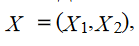

In [4]:
X_1: np.ndarray = np.delete(X, [3, -1], axis=1)
print(X_1.shape)
sp.Matrix(X_1)

(24, 6)


Matrix([
[1, 1, 0, 1, 0, 0],
[1, 1, 0, 1, 0, 0],
[1, 1, 0, 0, 1, 0],
[1, 1, 0, 0, 1, 0],
[1, 1, 0, 0, 0, 1],
[1, 1, 0, 0, 0, 1],
[1, 1, 0, 0, 0, 0],
[1, 1, 0, 0, 0, 0],
[1, 0, 1, 1, 0, 0],
[1, 0, 1, 1, 0, 0],
[1, 0, 1, 0, 1, 0],
[1, 0, 1, 0, 1, 0],
[1, 0, 1, 0, 0, 1],
[1, 0, 1, 0, 0, 1],
[1, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 0],
[1, 0, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 0],
[1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0]])

In [6]:
X_2: np.ndarray = X[:, [3, -1]]
print(X_2.shape)
sp.Matrix(X_2)

(24, 2)


Matrix([
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 1],
[0, 1],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 0],
[0, 1],
[0, 1],
[1, 0],
[1, 0],
[1, 0],
[1, 0],
[1, 0],
[1, 0],
[1, 1],
[1, 1]])

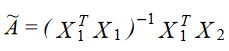

In [7]:
А_wavy: np.ndarray = np.round(np.dot(np.dot(inv(np.dot(X_1.T, X_1)), X_1.T), X_2), 4)
print(А_wavy.shape)
sp.Matrix(А_wavy)

(6, 2)


Matrix([
[ 1.0,  1.0],
[-1.0,    0],
[-1.0,    0],
[   0, -1.0],
[   0, -1.0],
[   0, -1.0]])

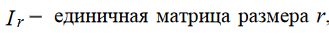

In [8]:
I_r: np.ndarray = np.eye(6)
print(I_r.shape)
sp.Matrix(I_r)

(6, 6)


Matrix([
[1.0,   0,   0,   0,   0,   0],
[  0, 1.0,   0,   0,   0,   0],
[  0,   0, 1.0,   0,   0,   0],
[  0,   0,   0, 1.0,   0,   0],
[  0,   0,   0,   0, 1.0,   0],
[  0,   0,   0,   0,   0, 1.0]])

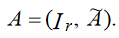

In [9]:
A: np.ndarray = np.hstack([I_r, А_wavy])
print(A.shape)
sp.Matrix(A) 

(6, 8)


Matrix([
[1.0,   0,   0,   0,   0,   0,  1.0,  1.0],
[  0, 1.0,   0,   0,   0,   0, -1.0,    0],
[  0,   0, 1.0,   0,   0,   0, -1.0,    0],
[  0,   0,   0, 1.0,   0,   0,    0, -1.0],
[  0,   0,   0,   0, 1.0,   0,    0, -1.0],
[  0,   0,   0,   0,   0, 1.0,    0, -1.0]])

In [10]:
X_reduced: np.ndarray = np.round(np.dot(X_1, A), 4)
print(X_reduced.shape)
sp.Matrix(X_reduced)

(24, 8)


Matrix([
[1.0, 1.0,   0, 1.0,   0,   0,   0,   0],
[1.0, 1.0,   0, 1.0,   0,   0,   0,   0],
[1.0, 1.0,   0,   0, 1.0,   0,   0,   0],
[1.0, 1.0,   0,   0, 1.0,   0,   0,   0],
[1.0, 1.0,   0,   0,   0, 1.0,   0,   0],
[1.0, 1.0,   0,   0,   0, 1.0,   0,   0],
[1.0, 1.0,   0,   0,   0,   0,   0, 1.0],
[1.0, 1.0,   0,   0,   0,   0,   0, 1.0],
[1.0,   0, 1.0, 1.0,   0,   0,   0,   0],
[1.0,   0, 1.0, 1.0,   0,   0,   0,   0],
[1.0,   0, 1.0,   0, 1.0,   0,   0,   0],
[1.0,   0, 1.0,   0, 1.0,   0,   0,   0],
[1.0,   0, 1.0,   0,   0, 1.0,   0,   0],
[1.0,   0, 1.0,   0,   0, 1.0,   0,   0],
[1.0,   0, 1.0,   0,   0,   0,   0, 1.0],
[1.0,   0, 1.0,   0,   0,   0,   0, 1.0],
[1.0,   0,   0, 1.0,   0,   0, 1.0,   0],
[1.0,   0,   0, 1.0,   0,   0, 1.0,   0],
[1.0,   0,   0,   0, 1.0,   0, 1.0,   0],
[1.0,   0,   0,   0, 1.0,   0, 1.0,   0],
[1.0,   0,   0,   0,   0, 1.0, 1.0,   0],
[1.0,   0,   0,   0,   0, 1.0, 1.0,   0],
[1.0,   0,   0,   0,   0,   0, 1.0, 1.0],
[1.0,   0,   0,   0,   0,

# МНК-оценивание редуцированной модели

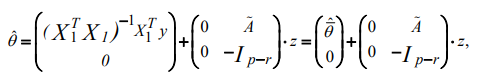

In [17]:
Y = [
    # A1
    3.1, 2.9, 
    4.1, 3.9, 
    2.1, 1.9,
    2.1, 1.9,
    # A2
    3.9, 4.1, 
    4.9, 5.1,
    2.9, 3.1,
    3.0, 3.0,
    # A3
    2.1, 1.9,
    3.1, 2.9,
    1.1, 0.9,
    1.0, 1.0
]
Y: np.array = np.array([Y]).T
print(Y.shape)
sp.Matrix(Y)

(24, 1)


Matrix([
[3.1],
[2.9],
[4.1],
[3.9],
[2.1],
[1.9],
[2.1],
[1.9],
[3.9],
[4.1],
[4.9],
[5.1],
[2.9],
[3.1],
[3.0],
[3.0],
[2.1],
[1.9],
[3.1],
[2.9],
[1.1],
[0.9],
[1.0],
[1.0]])

In [33]:
theta_dashed: np.ndarray = np.round(np.dot(np.dot(inv(np.dot(X_1.T, X_1)), X_1.T), Y), 4)
print(theta_dashed.shape)
sp.Matrix(theta_dashed)

(6, 1)


Matrix([
[1.0],
[1.0],
[2.0],
[1.0],
[2.0],
[  0]])